<a href="https://colab.research.google.com/github/macbhaldar/Predicting-Electricity-Demand/blob/main/Predicting_Electricity_Demand_2_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Raw Dataset

In [ ]:
df = pd.read_csv("electricity_demand_raw.csv")
df.head()

,day,hour,temp,measured_demand
0,0,0.0,25.745071,2.904928
1,0,0.5,25.836813,3.321722
2,0,1.0,28.042085,3.488050
3,0,1.5,30.346012,3.534498
4,0,2.0,28.648770,4.059016


### Basic Data Validation

In [ ]:
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day              1440 non-null   int64  
 1   hour             1440 non-null   float64
 2   temp             1440 non-null   float64
 3   measured_demand  1440 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 45.1 KB
None

Missing values:
day                0
hour               0
temp               0
measured_demand    0
dtype: int64


### Create Normalized Time Feature

In [ ]:
df["time_normalized"] = df["hour"] / 24.0

### Cyclical Encoding of Time

In [ ]:
df["sin_time"] = np.sin(2 * np.pi * df["time_normalized"])
df["cos_time"] = np.cos(2 * np.pi * df["time_normalized"])

### Encode Weekday vs Weekend

In [ ]:
df["weekday"] = df["day"] % 7
df["is_weekend"] = df["weekday"].isin([5, 6]).astype(int)

### Feature Visualization

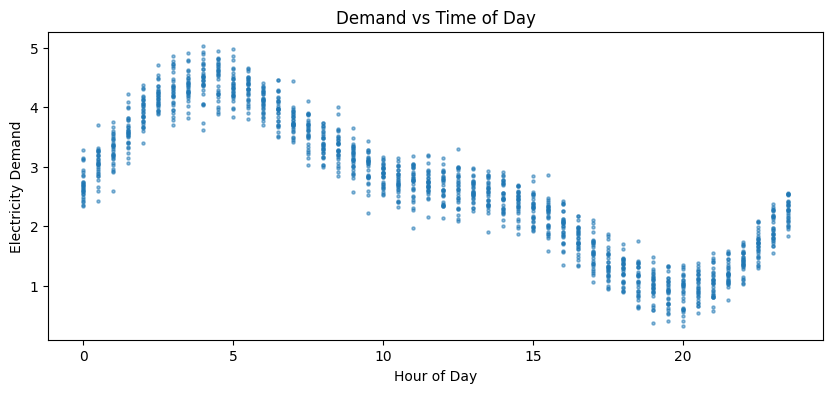

In [ ]:
plt.figure(figsize=(10, 4))
plt.scatter(df["hour"], df["measured_demand"], s=5, alpha=0.5)
plt.xlabel("Hour of Day")
plt.ylabel("Electricity Demand")
plt.title("Demand vs Time of Day")
plt.show()

### Correlation Analysis

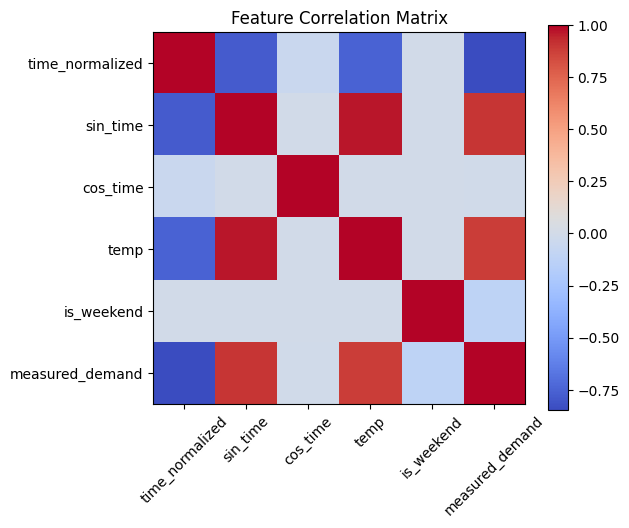

In [ ]:
feature_cols = [
    "time_normalized",
    "sin_time",
    "cos_time",
    "temp",
    "is_weekend",
    "measured_demand"
]

corr = df[feature_cols].corr()

plt.figure(figsize=(6, 5))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(feature_cols)), feature_cols, rotation=45)
plt.yticks(range(len(feature_cols)), feature_cols)
plt.title("Feature Correlation Matrix")
plt.show()

### Select Final Features

In [ ]:
final_features = [
    "day",
    "hour",
    "time_normalized",
    "sin_time",
    "cos_time",
    "temp",
    "is_weekend",
    "measured_demand"
]

df_final = df[final_features]
df_final.head()

,day,hour,time_normalized,sin_time,cos_time,temp,is_weekend,measured_demand
0,0,0.0,0.000000,0.000000,1.000000,25.745071,0,2.904928
1,0,0.5,0.020833,0.130526,0.991445,25.836813,0,3.321722
2,0,1.0,0.041667,0.258819,0.965926,28.042085,0,3.488050
3,0,1.5,0.062500,0.382683,0.923880,30.346012,0,3.534498
4,0,2.0,0.083333,0.500000,0.866025,28.648770,0,4.059016


### Save Feature-Engineered Dataset

In [ ]:
df_final.to_csv(
    "electricity_demand_features.csv",
    index=False
)

print("Saved: electricity_demand_features.csv")

Saved: electricity_demand_features.csv


### Feature Summary

In [ ]:
df_final.describe()

,day,hour,time_normalized,sin_time,cos_time,temp,is_weekend,measured_demand
count,1440.000000,1440.000000,1440.000000,1.440000e+03,1.440000e+03,1440.000000,1440.000000,1440.000000
mean,14.500000,11.750000,0.489583,1.480297e-17,-4.194176e-17,25.059766,0.266667,2.677105
std,8.658448,6.929106,0.288713,7.073524e-01,7.073524e-01,5.817560,0.442370,1.131194
min,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,13.877106,0.000000,0.327683
25%,7.000000,5.875000,0.244792,-7.071068e-01,-7.071068e-01,19.681004,0.000000,1.728567
50%,14.500000,11.750000,0.489583,6.123234e-17,-6.123234e-17,25.071541,0.000000,2.678247
75%,22.000000,17.625000,0.734375,7.071068e-01,7.071068e-01,30.447911,1.000000,3.611499
max,29.000000,23.500000,0.979167,1.000000e+00,1.000000e+00,37.125924,1.000000,5.031690


### Summary

- Normalized time for stability
- Applied cyclical encoding for daily patterns
- Included temperature as weather feature
- Encoded weekend behavior
- Saved clean ML-ready dataset

This dataset will be used in:
- Baseline model (RFF + Linear Regression)
- SVR, GPR, Neural Networks
- LSTM time-series modeling